In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data_path = './data'
out_path = './output'

In [3]:
exam = pd.read_csv(data_path+'/exam.csv')
mpg = pd.read_csv(data_path+'/mpg.csv')

# 데이터 정제

## 1 결측치 정제하기

### 결측치 만들기

In [4]:
df = pd.DataFrame({'sex':['M','F',np.nan,'M','F'],
                   'score' : [5,4,3,4,np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [5]:
df['score'] + 1 # 연산하면 출력결과도 NaN

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

### 결측치 확인하기

pd.isna(df)

In [6]:
pd.isna(df).sum() # 결측치의 빈도 확인

sex      1
score    1
dtype: int64

### 결측치 있는 행 제거하기

In [7]:
df_nomiss = df.dropna(subset='score')

In [8]:
df_nomiss['score'] + 1 # 결측치 없이 연산이 가능

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

### 여러 변수에 결측치 없는 데이터 추출하기

In [9]:
df_nomiss2 = df.dropna(subset = ['score','sex'])
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


### 결측치가 하나라도 있으면 제거하기

In [10]:
df_nomiss3 = df.dropna() # 모든 변수에 결측치 없는 데이터 추출
df_nomiss3

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


### 결측치를 제거하지 않고 분석하기(함수가 자동으로 제거)

In [ ]:
df.groupby('sex')\
.agg(mean_score = ('score','mean')\
     ,sum_socre = ('score','sum'))

,mean_score,sum_socre
sex,,
F,4.0,4.0
M,4.5,9.0


### 평균값으로 결측치 대체하기

In [12]:
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [13]:
exam.loc[[2,7,14],['math']] = np.nan # 결측치로 수정

In [14]:
exam['math'].isna().sum()

3

In [15]:
exam['math'].mean()

55.23529411764706

In [16]:
# math가 NaN이면 55로 대체
exam['math'].fillna(55)

0     50.0
1     60.0
2     55.0
3     30.0
4     25.0
5     50.0
6     80.0
7     55.0
8     20.0
9     50.0
10    65.0
11    45.0
12    46.0
13    48.0
14    55.0
15    58.0
16    65.0
17    80.0
18    89.0
19    78.0
Name: math, dtype: float64

In [17]:
exam['math'] = exam['math'].fillna(55)

In [18]:
exam['math'].isna().sum()

0

### 문제(18p)-과제 풀이

In [19]:
mpg.loc[[64,123,130,152,211], 'hwy'] = np.nan

In [20]:
# 결측치 빈도 확인
mpg[['drv','hwy']].isna().sum()

drv    0
hwy    5
dtype: int64

In [21]:
# 2
mpg.dropna(subset = ['hwy'])\
.groupby('drv')\
.agg(mean_hwy = ('hwy','mean'))

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


## 2 이상치 정제하기

### 이상치 제거하기 - 존재할 수 없는 값

In [22]:
df = pd.DataFrame({'sex':[1,2,1,3,2,1],
                   'score' : [5,4,3,4,2,6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


### 이상치 확인하기

In [23]:
df['sex'].value_counts()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [24]:
df['score'].value_counts().sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

### 결측 처리하기

In [25]:
# 성별이 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan,df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [26]:
# 성적도 5보다 크면 NaN 부여
df['score'] = np.where(df['score']>5,np.nan,df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [27]:
# 결측치를 제거한 다음, 성별에 따른 score 평균
df.dropna(subset=['sex','score'])\
.groupby('sex')\
.agg(mean_score = ('score','mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


### np.where() 문자와 NaN을 함께 반환할 수 없다.

In [28]:
df = pd.DataFrame({'x1':[1,1,2,2]})
df['x2'] =np.where(df['x1'] == 1, 'a', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [29]:
df.isna().sum()  # 문자열로 인식

x1    0
x2    0
dtype: int64

In [30]:
# 결측치로 만들 값에 문자 부여
df['x2'] = np.where(df['x1']==1, 'a','etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [31]:
# 'ect'를 NaN으로 바꾸기
df['x2'] = df['x2'].replace('etc',np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [32]:
df.isna().sum()

x1    0
x2    2
dtype: int64

### 이상치 제거하기 - 극단적인 값

#### 1. 상자 그림 살펴보기

<Axes: ylabel='hwy'>

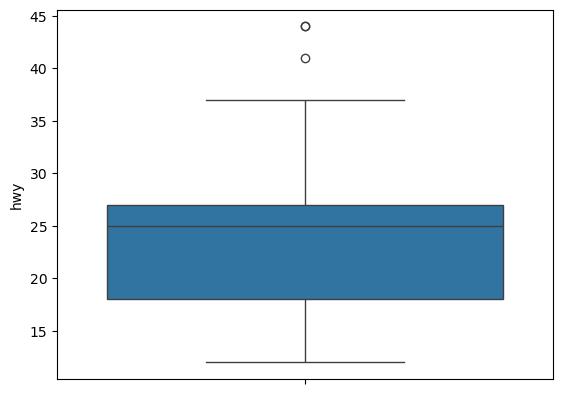

In [33]:
sns.boxplot(data = mpg, y = 'hwy')

#### 2. 극단치 기준값 구하기

In [34]:
# mpg['hwy']의 1사분위수
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [35]:
# 3사분위수
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [36]:
# IQR 구하기(1사분위수와 3사분위수의 거리)
IQR = pct75 - pct25
IQR

9.0

In [37]:
# 하한 : 1사분위수보다 'IQR의 1.5배'만큼 더 작은 값
min = pct25 - IQR*1.5
min

4.5

In [38]:
# 상한 : 3사분위수보다 'IQR의 1.5배'만큼 더 큰 값
max = pct75 + 1.5*IQR
max

40.5

In [39]:
# 4.5~40.5 벗어나면 NaN 부여
np.where((mpg['hwy'] < min) | (mpg['hwy'] > max),
         np.nan,mpg['hwy'])

array([29., 29., 31., 30., 26., 26., 27., 26., 25., 28., 27., 25., 25.,
       25., 25., 24., 25., 23., 20., 15., 20., 17., 17., 26., 23., 26.,
       25., 24., 19., 14., 15., 17., 27., 30., 26., 29., 26., 24., 24.,
       22., 22., 24., 24., 17., 22., 21., 23., 23., 19., 18., 17., 17.,
       19., 19., 12., 17., 15., 17., 17., 12., 17., 16., 18., 15., nan,
       12., 17., 17., 16., 12., 15., 16., 17., 15., 17., 17., 18., 17.,
       19., 17., 19., 19., 17., 17., 17., 16., 16., 17., 15., 17., 26.,
       25., 26., 24., 21., 22., 23., 22., 20., 33., 32., 32., 29., 32.,
       34., 36., 36., 29., 26., 27., 30., 31., 26., 26., 28., 26., 29.,
       28., 27., 24., 24., 24., 22., nan, 20., 17., 12., 19., 18., 14.,
       nan, 18., 18., 15., 17., 16., 18., 17., 19., 19., 17., 29., 27.,
       31., 32., 27., 26., 26., 25., 25., 17., 17., nan, 18., 26., 26.,
       27., 28., 25., 25., 24., 27., 25., 26., 23., 26., 26., 26., 26.,
       25., 27., 25., 27., 20., 20., 19., 17., 20., 17., 29., 27

In [40]:
mpg['hwy'] = np.where((mpg['hwy'] < min) | (mpg['hwy'] > max),
         np.nan,mpg['hwy'])

In [41]:
# 결측치 빈도 확인
mpg['hwy'].isna().sum()

8

In [42]:
# 결측치 제거 후 drv(구동방식)에 따라 hwy(고속도로 연비) 평균이 어떻게 다른지
mpg.dropna(subset = ['hwy'])\
.groupby('drv')\
.agg(mean_hwy = ('hwy','mean'))

,mean_hwy
drv,
4,19.242424
f,27.764706
r,21.000000


### 혼자서 해보기(p37)

In [43]:
mpg.loc[[9,13,57,92],'drv'] = 'k'
mpg.loc[[28,42,128,202],'cty'] = [3,4,39,42]

In [44]:
# drv에 이상치가 있는지 확인 후 결측 처리한 다음 이상치가 사라졌는지 확인
mpg['drv'].value_counts().sort_index()

drv
4    100
f    106
k      4
r     24
Name: count, dtype: int64

In [45]:
# drv가 4,f,r 이면 기존 값 유지, 그 외 NaN 부여
mpg['drv'] = np.where(mpg['drv'] == 'k', 'etc', mpg['drv'])
mpg['drv'] = mpg['drv'].replace('etc',np.nan)
mpg['drv'].value_counts()

drv
f    106
4    100
r     24
Name: count, dtype: int64

In [46]:
mpg['drv'] = np.where(mpg['drv'].isin(['f','4','r']),mpg['drv'],np.nan)
print(mpg['drv'].isna().sum())
mpg['drv'].value_counts()

4


drv
f    106
4    100
r     24
Name: count, dtype: int64

<Axes: ylabel='cty'>

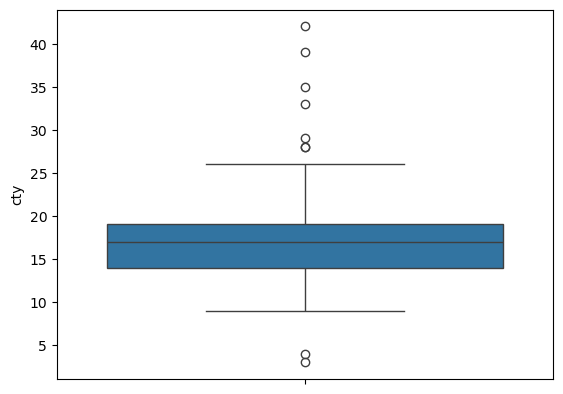

In [47]:
sns.boxplot(data=mpg,y='cty')

In [48]:
pct25 = mpg['cty'].quantile(.25)
pct75 = mpg['cty'].quantile(.75)
IQR = pct75 - pct25
min = pct25 - 1.5*IQR
max = pct75 + 1.5*IQR
mpg['cty'] = np.where((mpg['cty'] < min) | (mpg['cty'] > max),np.nan,mpg['cty'])

In [49]:
min

6.5

In [50]:
max

26.5

<Axes: ylabel='cty'>

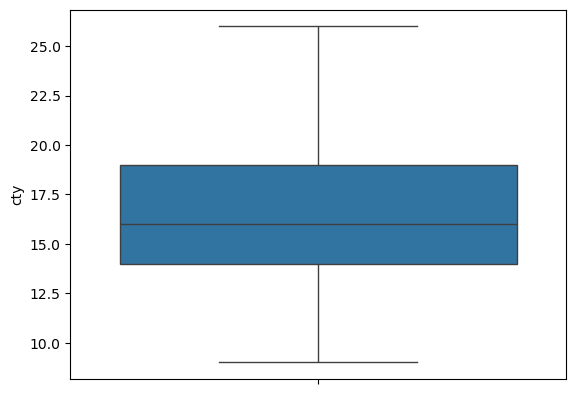

In [51]:
sns.boxplot(data=mpg,y='cty')

In [52]:
mpg.dropna(subset=['drv','cty'])\
.groupby('drv')\
.agg(mean_cty = ('cty','mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
